# Used Cars Sales Project

Historical Sales data of a Used Cars company for invoices from 2019 to 2021

Total Records in the Dataset : 164554

Total Columns in the Dataset : 22

**Columns in the dataset and their potential relevance:**

Lot Number:
Not likely to be directly relevant for predicting sale price. Considered as a unique identifier.

Yard Zip Code:
Could be relevant if the geographical location affects sale prices. May help in understanding regional variations.

Assignment Date, Loss Date, Invoice Date:
Time-related features. Analyzing trends over time could provide insights. It might be beneficial to extract additional features like month and year.

Vehicle Type, Lot Year, Make, Group Model, Lot Model:
Vehicle-related information. These are likely to be important features for predicting sale price.

ACV (Actual Cash Value):
This is a direct indicator of the value of the vehicle and should be highly relevant for predicting sale price.

Repair Est.:
Estimated repair cost. May provide information on the condition of the vehicle.

Loss Type, Primary Damage Type, Secondary Damage Type, Severity of Damage:
Information about the damage sustained by the vehicle. These features can give insights into the condition of the vehicle, which is crucial for predicting sale price.

Run Condition:
Indicates the status of the unit's engine and driving capacity. Could impact the sale price. (Starts, Not Starts, Driveable)

Title Group:
Indicates the category of the unit's title (clean, salvage, or junk). This could influence the perceived value and sale price.

Odometer, Odometer Brand:
Mileage-related information. Important for understanding the wear and tear on the vehicle.(Actual, Exempt, Not Actual, Exceeds limits)

Has Keys:
Indicates whether the unit has keys. May impact the perceived value and sale price.

Sale Price:
The target variable for prediction.

**To summarize, the columns like Lot Number, Yard Zip Code, and the date-related columns may not be directly relevant for predicting sale price. Features related to the vehicle itself, its condition, and associated costs are likely to be crucial. Additionally, exploring the relationships between these features and the target variable through EDA can provide valuable insights.**

## Importing required libraries in Python: 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

## Data Import and Summary Statistics:

In [2]:
Sales_data = pd.read_csv("UsedCarsProject.csv")

In [3]:
Sales_data.shape

(164554, 22)

In [4]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164554 entries, 0 to 164553
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lot Number             164554 non-null  int64  
 1   Yard Zip Code          164554 non-null  int64  
 2   Assignment Date        164554 non-null  int64  
 3   Loss Date              164554 non-null  int64  
 4   Invoice Date           164554 non-null  int64  
 5   Vehicle Type           157100 non-null  object 
 6   Lot Year               164554 non-null  int64  
 7   Make                   164554 non-null  object 
 8   Group Model            134237 non-null  object 
 9   Lot Model              164554 non-null  object 
 10  ACV                    164554 non-null  float64
 11  Repair Est.            164554 non-null  float64
 12  Loss Type              75646 non-null   object 
 13  Primary Damage Type    164554 non-null  object 
 14  Secondary Damage Type  164554 non-nu

In [5]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date  Invoice Date  \
0    65907995          87105         20211115   20211113      20211231   
1    55064444          87105         20201103   20201028      20211231   
2    58436684          87105         20201204   20201108      20211231   
3    46584854          87105         20200817   20200807      20211231   
4    66331165          85043         20211117   20211116      20211231   

  Vehicle Type  Lot Year   Make Group Model   Lot Model  ...  Loss Type  \
0            V      2013  TOYT   CAMRY       CAMRY SE    ...        NaN   
1            V      2017  GMC    SIERRA      SIERRA K15  ...        NaN   
2            V      2015  FORD          NaN  EXPLORER    ...        NaN   
3            V      2011  MERZ   C-CLASS     C 300       ...          C   
4            V      2018  FORD   EXPLORER    EXPLORER L  ...          C   

   Primary Damage Type Secondary Damage Type Severity of Damage Run Condition  \
0                   FR                                        2             D   
1                   FR                                        1             S   
2                   FR                                        1             S   
3                   SD                                        1             D   
4                   FR                                        2             N   

   Title Group Odometer Odometer Brand  Has Keys Sale Price  
0            S   128285              A         Y     3100.0  
1            S   156448              A         Y     9200.0  
2            S    73093              A         Y     3350.0  
3            S    93635              A         Y     3600.0  
4            S   120416              A         Y     6000.0  

[5 rows x 22 columns]

In [6]:
Sales_data.describe()

Lot Number  Yard Zip Code  Assignment Date     Loss Date  \
count  1.645540e+05  164554.000000     1.645540e+05  1.645540e+05   
mean   4.490138e+07   85597.181272     2.020010e+07  2.018783e+07   
std    1.088152e+07     846.110654     8.952251e+03  4.775665e+05   
min    1.843142e+07   85043.000000     2.014063e+07  0.000000e+00   
25%    3.561785e+07   85043.000000     2.019100e+07  2.019090e+07   
50%    4.528740e+07   85043.000000     2.020062e+07  2.020052e+07   
75%    5.415575e+07   85706.000000     2.021032e+07  2.021022e+07   
max    7.019508e+07   87105.000000     2.022122e+07  2.021122e+07   

       Invoice Date       Lot Year            ACV   Repair Est.  \
count  1.645540e+05  164554.000000  164554.000000  1.645540e+05   
mean   2.020168e+07    2010.874686   11097.244878  8.886675e+03   
std    8.062635e+03       6.076323   10723.361051  1.898741e+04   
min    2.019010e+07    1918.000000       0.000000  0.000000e+00   
25%    2.019120e+07    2007.000000    4990.000000  3.753915e+03   
50%    2.020082e+07    2012.000000    8477.000000  7.327880e+03   
75%    2.021051e+07    2016.000000   13955.000000  1.200378e+04   
max    2.021123e+07    2021.000000  725290.000000  6.336204e+06   

       Severity of Damage      Odometer    Sale Price  
count       164554.000000  1.645540e+05  1.645540e+05  
mean             1.557817  9.481368e+04  8.624027e+03  
std              0.794843  7.654810e+04  6.825220e+04  
min              0.000000  0.000000e+00  0.000000e+00  
25%              1.000000  3.583675e+04  8.750000e+02  
50%              2.000000  8.951700e+04  1.900000e+03  
75%              2.000000  1.415290e+05  3.950000e+03  
max              3.000000  3.577926e+06  5.200000e+06

## Data Cleaning and Pre-processing:

Below are the steps for Data Cleaning and Pre-processing part which I performed on the Data:

1. Replaced spaces/tabs in the dataset with Null values.
2. Dropped Duplicates present in the dataset.
3. Checked for Null Values and treated the columns containing Null values as below:
    - Vehicle Type: Replaced null values in this categorical column by creating a new category called 'Unknown'.
    - Group Model: Dropped this column as for most of the records this column had data which was related to the data in Lot Model column. 
    - Loss Type: Dropped this column as it was Null for almost 50% of the records in the dataset. 
    - Secondary Damage Type: Dropped this column as it was Null for almost 50% of the records in the dataset. 
    - Title Group, Odometer Brand, Has Keys: Mode Imputation as there were only few Null values present in this column. Mode Imputations preserve original distribution of the categorical variable
4. Checked for some records Assignment Date was greater tha Invoice Date which I feel was not appropriate as company would be able to generate an Invoice and sell it once it is Assigned by the consigner. Hence, dropped the columns where Invoice Date < Assignment Date.
5. Deleting any blank spaces present in the Lot Model column (categorical) and replacing spaces between words with underscore '_' by changing it to uppercase, so that any duplicate categories present would be eliminated.
6. Some rows had value for Sale Price as 0, which were dropped assuming it to be errorneous.
7. Extracting Month and Year details from Invoice Date

Post Data Cleaning - 
Total records: 155546, Total columns: 20

Below is the code for above mentioned steps.

In [7]:
# For extra spaces in columns
Sales_data.replace(['', ' ', '  ','     ', '\t'], np.nan, inplace=True)

In [8]:
# Check for Duplicates
Sales_data.duplicated().sum()

4312

In [9]:
# Drop Duplicates
Sales_data=Sales_data.drop_duplicates()

In [10]:
# Check for Null Values
Sales_data.isna().sum()

Lot Number                   0
Yard Zip Code                0
Assignment Date              0
Loss Date                    0
Invoice Date                 0
Vehicle Type              7454
Lot Year                     0
Make                         0
Group Model              30317
Lot Model                    0
ACV                          0
Repair Est.                  0
Loss Type                88909
Primary Damage Type          0
Secondary Damage Type    90720
Severity of Damage           0
Run Condition                0
Title Group                 19
Odometer                     0
Odometer Brand             163
Has Keys                     5
Sale Price                   0
dtype: int64

In [11]:
#Dropping below columns as Null values in that columns are more in number. 
#Also, Data in Group Model is a subset of the data in Lot Model. hence, dropping it.

columns_to_drop = ['Loss Type', 'Group Model','Secondary Damage Type']
Sales_data.drop(columns=columns_to_drop, inplace=True)

In [12]:
#Imputing Null Values in Vehicle Type column with a new category named 'Unknown'
Sales_data['Vehicle Type'].fillna('Unknown', inplace=True)

In [13]:
#Mode Imputation in Title Group, Odometer Brand and Has Keys column as they have <1% of the total values missing and it is less sensitive to outliers.

Sales_data['Has Keys'].fillna(Sales_data['Has Keys'].mode()[0], inplace=True)
Sales_data['Odometer Brand'].fillna(Sales_data['Odometer Brand'].mode()[0], inplace=True)
Sales_data['Title Group'].fillna(Sales_data['Title Group'].mode()[0], inplace=True)

In [14]:
Sales_data.isna().sum()

Lot Number             0
Yard Zip Code          0
Assignment Date        0
Loss Date              0
Invoice Date           0
Vehicle Type           0
Lot Year               0
Make                   0
Lot Model              0
ACV                    0
Repair Est.            0
Primary Damage Type    0
Severity of Damage     0
Run Condition          0
Title Group            0
Odometer               0
Odometer Brand         0
Has Keys               0
Sale Price             0
dtype: int64

In [15]:
# Observed some records have Assignment Date < Invoice Date. 
# As per my understanding it is not possible to sell the unit unless it is assigned to company by consigner.

condition = Sales_data['Invoice Date'] < Sales_data['Assignment Date']
filtered_df = Sales_data[condition]
indices_to_drop = filtered_df.index
Sales_data.drop(indices_to_drop, inplace=True)

In [16]:
# Deleting any spaces in Lot Model column and replacing it with underscore and converting all the data in Lot model to Uppercase
Sales_data['Lot Model'].value_counts()

SILVERADO     3257
ALTIMA 2.5    2765
SENTRA S      2203
CIVIC LX      2110
F150 SUPER    1732
              ... 
600 MR600        1
PRADO            1
VT750C2          1
XC40 T5 MO       1
DAKOTA RT        1
Name: Lot Model, Length: 4386, dtype: int64

In [17]:
Sales_data['Lot Model'] = Sales_data['Lot Model'].str.strip().str.upper().replace(r'\s+', '_', regex=True)

In [18]:
#Some of the records have Sale Price = 0, which is not possible. Hence, excluding such records from Dataset
Sales_data = Sales_data[Sales_data['Sale Price'] != 0]

In [19]:
Sales_data.shape

(155546, 19)

In [20]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date  Invoice Date  \
0    65907995          87105         20211115   20211113      20211231   
1    55064444          87105         20201103   20201028      20211231   
2    58436684          87105         20201204   20201108      20211231   
3    46584854          87105         20200817   20200807      20211231   
4    66331165          85043         20211117   20211116      20211231   

  Vehicle Type  Lot Year   Make   Lot Model      ACV  Repair Est.  \
0            V      2013  TOYT     CAMRY_SE  12549.0      6297.55   
1            V      2017  GMC    SIERRA_K15  25236.0         0.00   
2            V      2015  FORD     EXPLORER  15477.0     14192.19   
3            V      2011  MERZ        C_300   8140.0         0.00   
4            V      2018  FORD   EXPLORER_L  24740.0     15336.36   

  Primary Damage Type  Severity of Damage Run Condition Title Group  Odometer  \
0                  FR                   2             D           S    128285   
1                  FR                   1             S           S    156448   
2                  FR                   1             S           S     73093   
3                  SD                   1             D           S     93635   
4                  FR                   2             N           S    120416   

  Odometer Brand Has Keys  Sale Price  
0              A        Y      3100.0  
1              A        Y      9200.0  
2              A        Y      3350.0  
3              A        Y      3600.0  
4              A        Y      6000.0

In [21]:
#Extracting Year and Month from Invoice Date

def process_date_columns(Sales_data, date_columns):
    for col in date_columns:
        Sales_data[col] = Sales_data[col].astype(str)
        Sales_data[f'{col} Month'] = Sales_data[col].str[4:6].replace('', '0')
        Sales_data[f'{col} Year'] = Sales_data[col].str[:4].replace('', '0')

    Sales_data.drop(columns=date_columns, inplace=True)

    # Convert Month and Year columns to integers
    month_year_columns = [f'{col} Month' for col in date_columns] + [f'{col} Year' for col in date_columns]
    Sales_data[month_year_columns] = Sales_data[month_year_columns].astype(int)

# List of date columns
date_columns = ['Invoice Date']

# Apply the function
process_date_columns(Sales_data, date_columns)

In [22]:
Sales_data.shape

(155546, 20)

In [23]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date Vehicle Type  \
0    65907995          87105         20211115   20211113            V   
1    55064444          87105         20201103   20201028            V   
2    58436684          87105         20201204   20201108            V   
3    46584854          87105         20200817   20200807            V   
4    66331165          85043         20211117   20211116            V   

   Lot Year   Make   Lot Model      ACV  Repair Est. Primary Damage Type  \
0      2013  TOYT     CAMRY_SE  12549.0      6297.55                  FR   
1      2017  GMC    SIERRA_K15  25236.0         0.00                  FR   
2      2015  FORD     EXPLORER  15477.0     14192.19                  FR   
3      2011  MERZ        C_300   8140.0         0.00                  SD   
4      2018  FORD   EXPLORER_L  24740.0     15336.36                  FR   

   Severity of Damage Run Condition Title Group  Odometer Odometer Brand  \
0                   2             D           S    128285              A   
1                   1             S           S    156448              A   
2                   1             S           S     73093              A   
3                   1             D           S     93635              A   
4                   2             N           S    120416              A   

  Has Keys  Sale Price  Invoice Date Month  Invoice Date Year  
0        Y      3100.0                  12               2021  
1        Y      9200.0                  12               2021  
2        Y      3350.0                  12               2021  
3        Y      3600.0                  12               2021  
4        Y      6000.0                  12               2021

## Exploratory Data Analysis

For performing EDA, below steps were performed:

1. Checked for the distribution of Sale Price.
    - Observed from the Sale Price histogram that there were outliers present and the distribution was extremely skewed. 
    - To tackle this, I performed Log transformation on Sale Price and then observed its distribution which was similar to Normal Distribution.
    
    
2. Compared Sale Price values against multiple categorical fields present in the dataset like Odometer Brand, Title Group, Run Condition, Severity of Damage.
    - Sale price is affected by categorical columns mentioned above as seen from the bar plots.
    - Sale Price is highest, if the vehicle starts without any issues as compared to other two categories.
    - Sale Price is comparatively higher is the Title for the vehicle is Clean.
    - Sale Price is higher if Odometer value is Actual and lowest when the odometer value exceeds mechanical limits.
    - Sale Price is higher when Severity of Damage is lower.
    
    
3. Examined the effect of Invoice Year on Sale Price.
    - Over the time Sale Price of units sold through company has been increasing since 2019.
    
    
4. Created scatter plots to check the effect of Odometer, ACV and Repair Estimate columns on Sale Price.
    - As per the scatter plots obtained, Sale Price increases with increase in ACV and Repair Estimate but decreases with Increase in Odometer.
    
    
5. Created a line plot that visualizes the average sale count per month over multiple years (Invoice Year).
    - For the year 2020, sales dropped after April due to Covid and then gradually increased towards the end of the year.
    - Sales were higher in 2021 as compared to 2019 following the same pattern where Sales increased at the end of the year.
    
    
6. Examined the effect of Lot Year on Average Sale Price.
    - Average Sale Price is greater if Lot Year is recent. However, there are exceptions wherein spikes can be seen in the data for older classic models which are not sold in the market now.
    
    
8. Top 10 manufacturers with highest average Sale price.
    - REEF manufacturer has the highest average Sale Price followed by GREA and THOR.


9. Top 10 models with highest average Sale Price.
    - X7_Drives (BMW) has the highest average Sale price among all the models followed by FREEDOM_EL (THOR) and VNR (VOLV).
    
    
10. Top 10 models with highest sale count.
     - Highest sold model is SILVERADO (CHEV) followed by ALTIMA_2.5 (NISS) AND SENTRA_S (NISS). 
    

11. Top 10 manufacturers with highest sale count and top 5 models for each of the top 10 manufacturers.
    - Manufacturer who had highest sale count is NISS followed by TOYT, FORD and CHEV.
    
    
12. Heatmap - Correlation matrix
    - Positive Correlation is observed between Log Sale Price and ACV, Lot Year, Repair Estimate.
    - Odometer, Severity Damage show negative Corelation as expected

Below is the code for above steps.

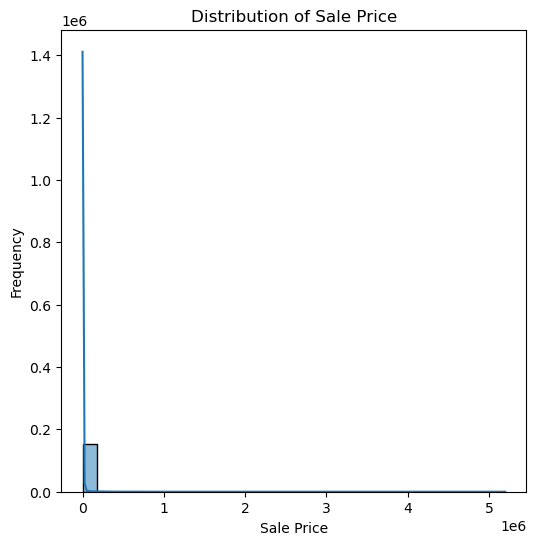

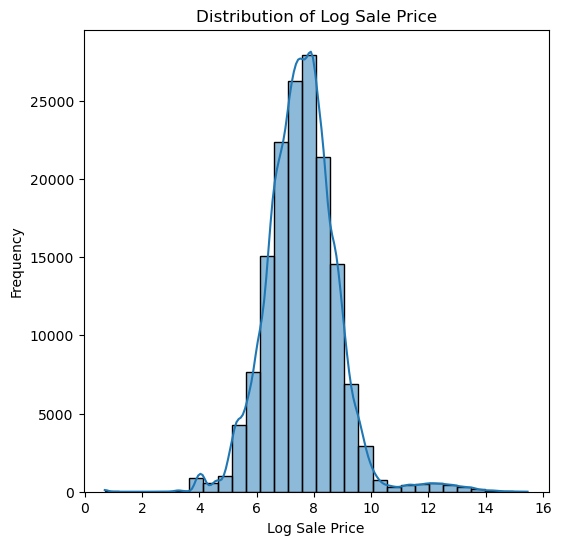

In [24]:
def plot_histplot(data, column_name):
    plt.figure(figsize=(6, 6))
    sns.histplot(data[column_name], bins=30, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Original Sale Price
plot_histplot(Sales_data, 'Sale Price')

# Log Sale Price
Sales_data['Log Sale Price'] = np.log1p(Sales_data['Sale Price'])
plot_histplot(Sales_data, 'Log Sale Price')

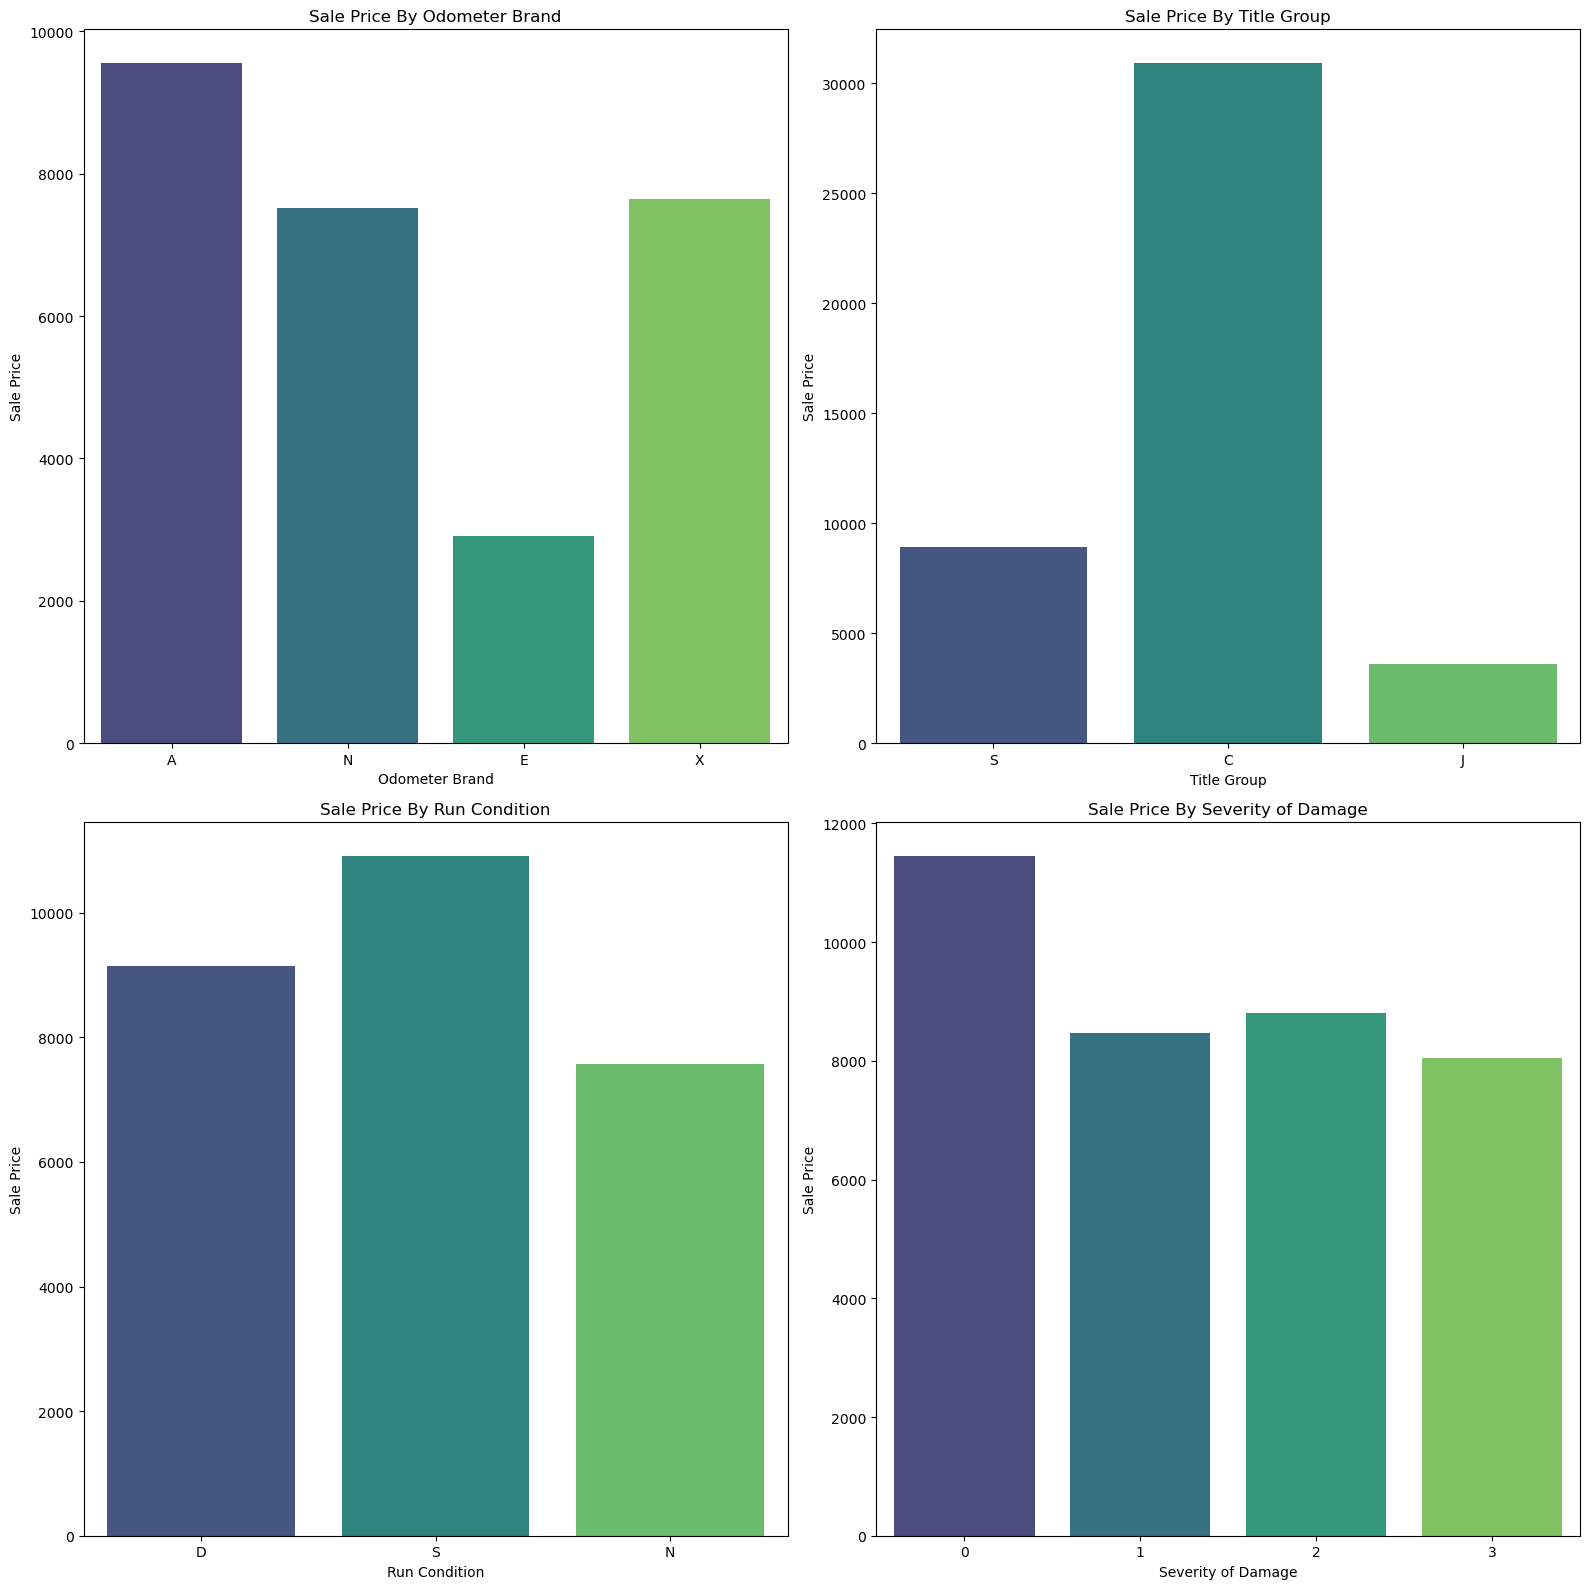

In [25]:
# Effect of Sale Price on Categorical columns
columns_to_plot = ['Odometer Brand', 'Title Group', 'Run Condition', 'Severity of Damage']

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 2

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop over columns and create subplots

for i, column in enumerate(columns_to_plot):
    box = sns.barplot(x=column, y='Sale Price', data=Sales_data, palette='viridis', ci=None, ax=axes[i])
    box.set_title(f"Sale Price By {column}")
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

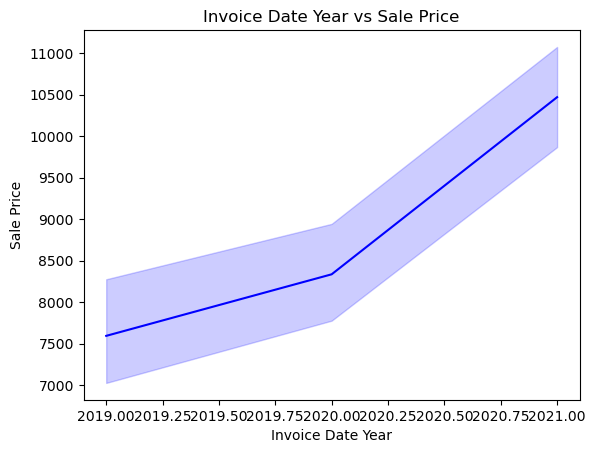

In [26]:
# Examining the effect between Sale Price and Year of sale & Sale Price & Year in which the unit was assigned to Company
years_columns = ['Invoice Date Year']

for year_column in years_columns:
    sns.lineplot(x=year_column, y='Sale Price', data=Sales_data,color='blue')
    plt.xlabel(f'{year_column}')
    plt.ylabel('Sale Price')
    plt.title(f'{year_column} vs Sale Price')
    plt.show()
    
# Over the time Sale Price of units sold through Company has been increasing since 2019.

Text(0.5, 1.0, 'Sale Price Vs Odometer')

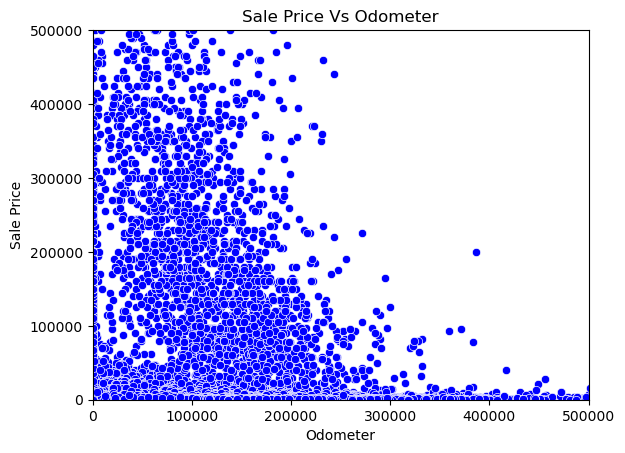

In [27]:
# Sale Price vs Odometer reading

sns.scatterplot(y='Sale Price', x='Odometer', data=Sales_data,color='blue')
plt.xlim(0, 500000)  # Adjust these values based on your preference
plt.ylim(0, 500000)
plt.title('Sale Price Vs Odometer')

#From the below plot, we can depict that as Odometer reading increases, Sale Price of the unit decreases

Text(0.5, 1.0, 'Sale Price Vs Repair Estimate')

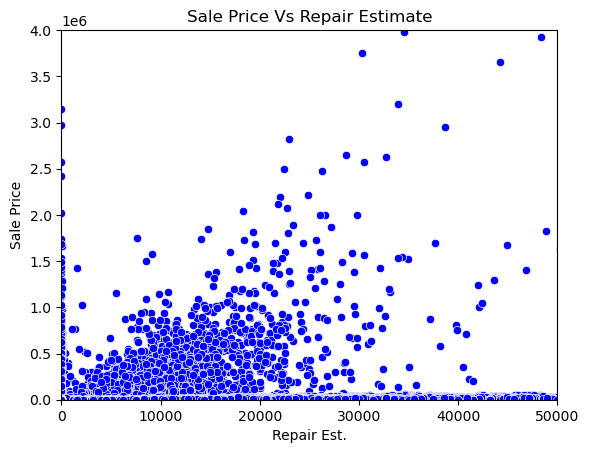

In [28]:
# Sale Price vs Repair estimate

sns.scatterplot(y='Sale Price', x='Repair Est.', data=Sales_data,color='blue')
plt.xlim(0, 50000)  # Adjust these values based on your preference
plt.ylim(0, 4000000)
plt.title('Sale Price Vs Repair Estimate')

#As Repair Estimate increases, Sale Price increases (Maybe because of the expensive parts of repair for models)

Text(0.5, 1.0, 'Sale Price Vs ACV')

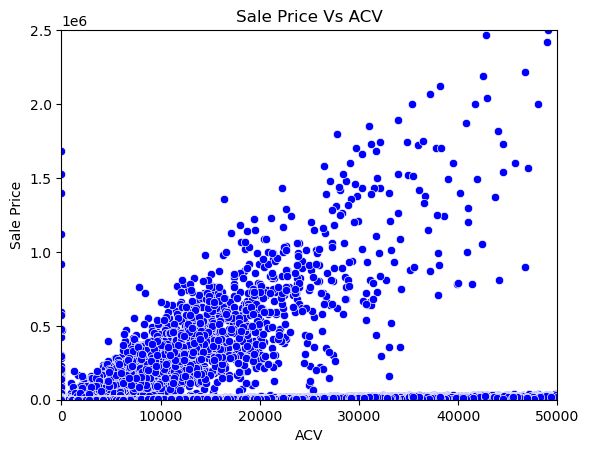

In [29]:
# Sale Price vs ACV

sns.scatterplot(y='Sale Price', x='ACV', data=Sales_data,color='blue')
plt.xlim(0, 50000)  # Adjust these values based on your preference
plt.ylim(0, 2500000)
plt.title('Sale Price Vs ACV')

#As ACV increases, Sale price increases

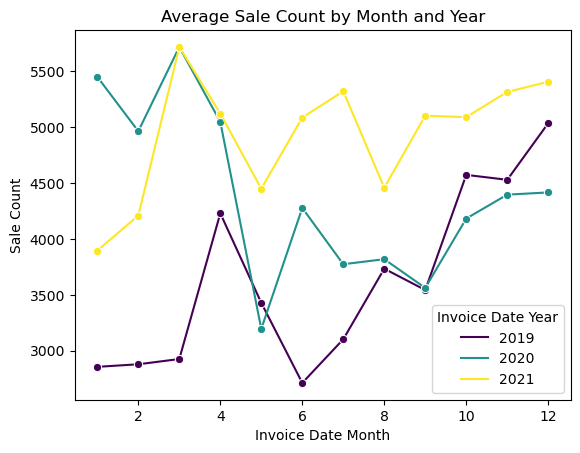

In [30]:
#Average Sale Count by Year and Month
average_count_by_invoice_month_year = Sales_data.groupby(['Invoice Date Year', 'Invoice Date Month'])['Sale Price'].count().reset_index()
line_plot = sns.lineplot(x='Invoice Date Month', y='Sale Price', hue='Invoice Date Year', data=average_count_by_invoice_month_year,palette='viridis', marker='o')
plt.title('Average Sale Count by Month and Year')
plt.ylabel('Sale Count')
plt.show()


Text(0.5, 1.0, 'Avg Sale Price Vs Lot Year')

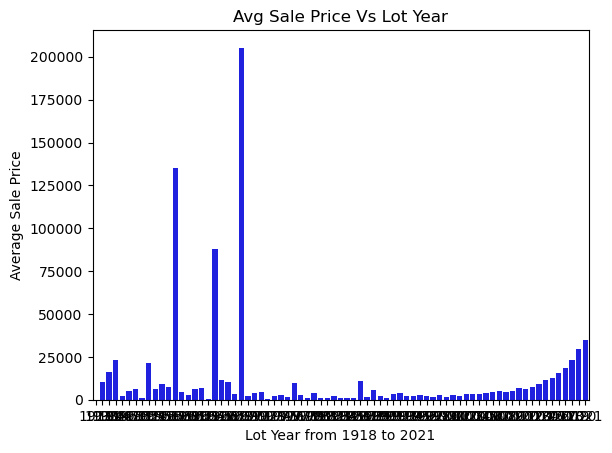

In [31]:
# Relationship between Lot Year and Sale Price

LotYear_by_SalePrice = Sales_data.groupby('Lot Year')['Sale Price'].mean().reset_index()
sns.barplot(y='Sale Price', x='Lot Year', data=LotYear_by_SalePrice, color='blue')
plt.xlabel('Lot Year from 1918 to 2021')
plt.ylabel('Average Sale Price')
plt.title('Avg Sale Price Vs Lot Year')

# Sale Price is greater if Lot Year is recent. 
# However, there are exceptions wherein spikes can be seen in the data for older classic models which are not sold in the market now

Text(0.5, 1.0, 'Top 10 Manufacturers as per Avg Sale Price')

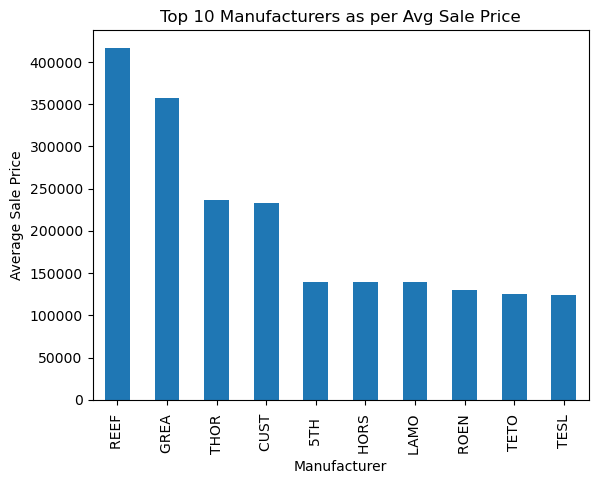

In [32]:
# Top 10 Manufacturers as per Sale Price

avg_SP_Make = Sales_data.groupby('Make')['Sale Price'].mean().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Manufacturers as per Avg Sale Price')

Text(0.5, 1.0, 'Top 10 Models as per Avg Sale Price')

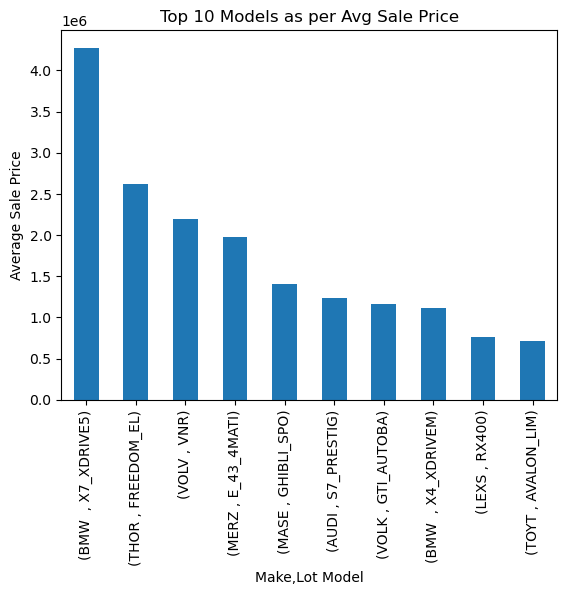

In [33]:
# Top 10 Models as per Sale Price

avg_SP_Make = Sales_data.groupby(['Make','Lot Model'])['Sale Price'].mean().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Models as per Avg Sale Price')

Text(0.5, 1.0, 'Top 10 Models as per Sale Count')

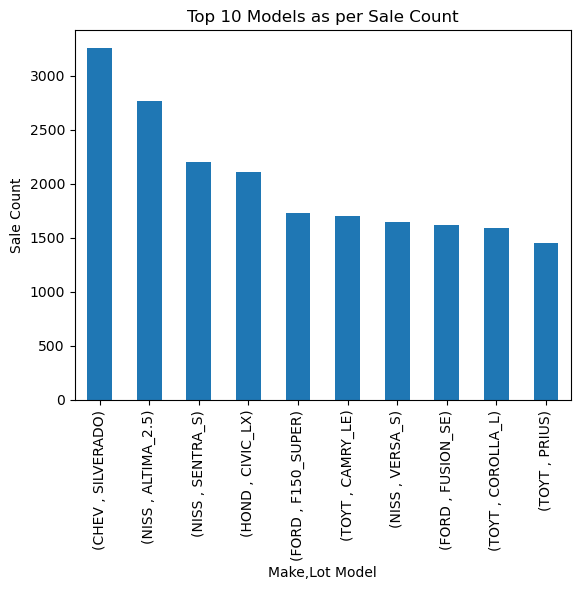

In [34]:
# Top 10 Models as per Sale Count

avg_SP_Make = Sales_data.groupby(['Make','Lot Model'])['Sale Price'].count().nlargest(10)
avg_SP_Make.plot(kind='bar')
plt.ylabel('Sale Count')
plt.title('Top 10 Models as per Sale Count')

In [35]:
# Top 5 models of Top 10 Manufacturers

# Find the top 10 manufacturers based on sale count
top10_manufacturers = Sales_data['Make'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only the top 10 manufacturers
df_top10_manufacturers = Sales_data[Sales_data['Make'].isin(top10_manufacturers)]

# Group by Manufacturer and Model to get sale count for each combination
manufacturer_model_counts = df_top10_manufacturers.groupby(['Make', 'Lot Model'])['Sale Price'].count().reset_index(name='Sale Count')


# Sort by Sale Count in descending order to find the top models for each manufacturer
manufacturer_model_counts = manufacturer_model_counts.sort_values(by=['Make', 'Sale Count'], ascending=[True, False])

# Get the top 5 models for each of the top 10 manufacturers
top5_models_per_manufacturer = manufacturer_model_counts.groupby('Make').head(5)

fig = px.bar(top5_models_per_manufacturer,
             x='Make',
             y='Sale Count',
             color='Lot Model',
             labels={'Make': 'Manufacturer', 'Sale Count': 'Sale Count'},
             title='Top 5 Models for top 10 Manufacturers - Sale Count',
             width=800,
             height=600)

# Customize the layout
fig.update_layout(xaxis_title='Manufacturer', yaxis_title='Sale Count')
fig.update_layout(legend_title='Lot Model')
fig.update_layout(legend=dict(x=1.05, y=1))

# Show the plot
fig.show()

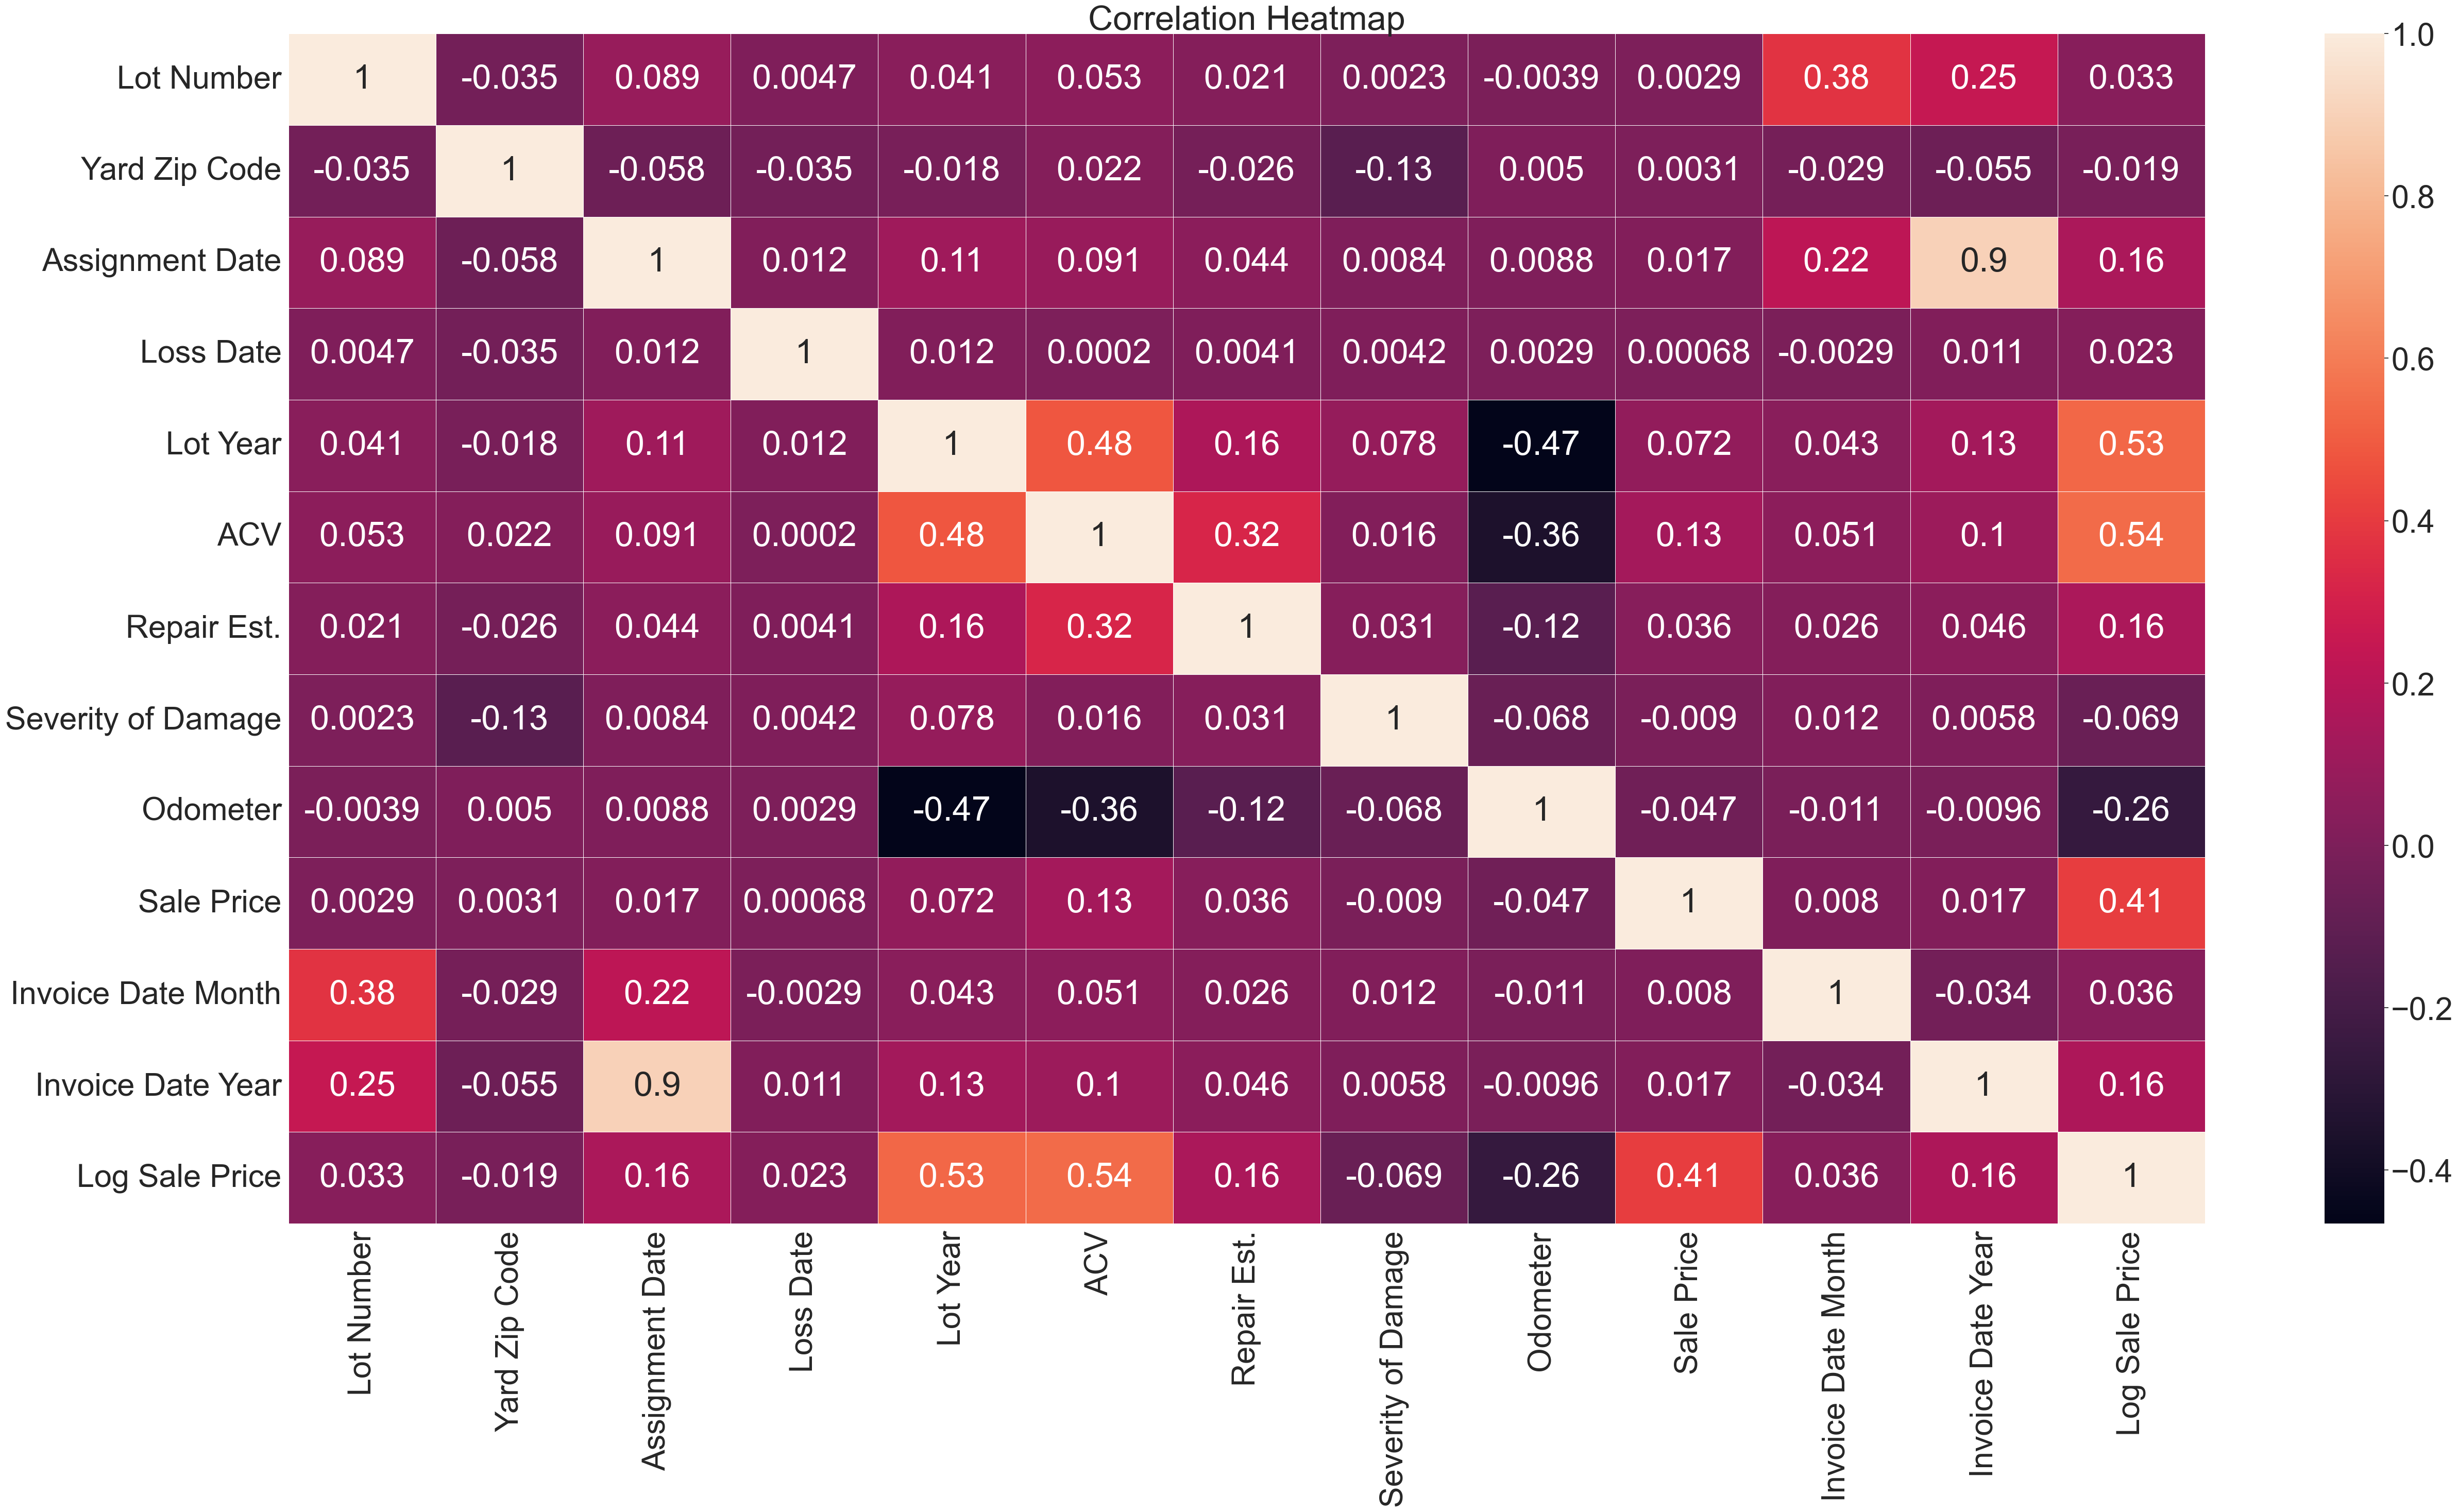

In [36]:
# Correlation Analysis - Heatmap

corr_matrix = Sales_data.corr()

plt.figure(figsize=(60, 30))  # Increase the figure size
sns.set(font_scale=4)  # Adjust font size for annotations
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Preparation

Below steps were followed for Data Preparation:

1. Dropped Irrelevant columns from the dataset like Lot Number, Assignment Year, Assignment Month, Sale Price (as we will be using Log Sale Price as target Variable).
2. Performed One Hot encoding on 'Vehicle Type','Primary Damage Type','Has Keys','Odometer Brand','Title Group','Run Condition'.
3. Performed Binary Encoding on 'Lot Model' and 'Make' as there were high number of categories (high-cardinality). One-hot encoding can lead to a large number of columns, which may use high memory and computational resources and  may also result in the curse of dimensionality.
4. Ensured that each and every column in the dataset is numerical and not categorical so that we can use it for Model implementation.
5. Created a Target Variable 'y' with Log Sale Price values. Created predictors in 'X' by dropping Log Sale Price from the existing dataframe.
6. Data Splitting in to training and test set by using 30% od the data as test set.
7. Performed Standard scaling on X to standardize the range of features. Standard scaling is basically transforming the data so that it has a mean of 0 and a standard deviation of 1. 
8. Used this scaled data (X_train_sc & X_test_Sc) during model implementations.

In [37]:
Sales_data.head()

Lot Number  Yard Zip Code  Assignment Date  Loss Date Vehicle Type  \
0    65907995          87105         20211115   20211113            V   
1    55064444          87105         20201103   20201028            V   
2    58436684          87105         20201204   20201108            V   
3    46584854          87105         20200817   20200807            V   
4    66331165          85043         20211117   20211116            V   

   Lot Year   Make   Lot Model      ACV  Repair Est.  ... Severity of Damage  \
0      2013  TOYT     CAMRY_SE  12549.0      6297.55  ...                  2   
1      2017  GMC    SIERRA_K15  25236.0         0.00  ...                  1   
2      2015  FORD     EXPLORER  15477.0     14192.19  ...                  1   
3      2011  MERZ        C_300   8140.0         0.00  ...                  1   
4      2018  FORD   EXPLORER_L  24740.0     15336.36  ...                  2   

   Run Condition Title Group Odometer  Odometer Brand Has Keys Sale Price  \
0              D           S   128285               A        Y     3100.0   
1              S           S   156448               A        Y     9200.0   
2              S           S    73093               A        Y     3350.0   
3              D           S    93635               A        Y     3600.0   
4              N           S   120416               A        Y     6000.0   

   Invoice Date Month  Invoice Date Year  Log Sale Price  
0                  12               2021        8.039480  
1                  12               2021        9.127067  
2                  12               2021        8.117014  
3                  12               2021        8.188967  
4                  12               2021        8.699681  

[5 rows x 21 columns]

In [38]:
Sales_data.nunique()

Lot Number             145346
Yard Zip Code               3
Assignment Date          1419
Loss Date                1750
Vehicle Type               14
Lot Year                   75
Make                      494
Lot Model                4374
ACV                     55902
Repair Est.            109016
Primary Damage Type        25
Severity of Damage          4
Run Condition               3
Title Group                 3
Odometer                96657
Odometer Brand              4
Has Keys                    3
Sale Price                736
Invoice Date Month         12
Invoice Date Year           3
Log Sale Price            736
dtype: int64

In [39]:
SD = Sales_data.copy()

In [40]:
# Drop columns which are not required for predictions
SD.drop(columns=['Yard Zip Code','Vehicle Type','Has Keys','Sale Price', 'Loss Date', 'Assignment Date','Invoice Date Month','Invoice Date Year','Lot Number','Lot Model'], inplace=True)

In [41]:
SD.head()

Lot Year   Make      ACV  Repair Est. Primary Damage Type  \
0      2013  TOYT   12549.0      6297.55                  FR   
1      2017  GMC    25236.0         0.00                  FR   
2      2015  FORD   15477.0     14192.19                  FR   
3      2011  MERZ    8140.0         0.00                  SD   
4      2018  FORD   24740.0     15336.36                  FR   

   Severity of Damage Run Condition Title Group  Odometer Odometer Brand  \
0                   2             D           S    128285              A   
1                   1             S           S    156448              A   
2                   1             S           S     73093              A   
3                   1             D           S     93635              A   
4                   2             N           S    120416              A   

   Log Sale Price  
0        8.039480  
1        9.127067  
2        8.117014  
3        8.188967  
4        8.699681

In [42]:
#Categorical Column Encoding

#One hot encoding
columns_to_encode=['Odometer Brand','Title Group','Run Condition']
SD = pd.get_dummies(SD, columns=columns_to_encode, prefix=columns_to_encode)

In [43]:
# Binary Encoding for Lot Model and Make as the number of categories are more

binary_encoder = ce.BinaryEncoder(cols=['Make','Primary Damage Type'])
SD = binary_encoder.fit_transform(SD)

In [44]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155546 entries, 0 to 164553
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lot Year               155546 non-null  int64  
 1   Make_0                 155546 non-null  int64  
 2   Make_1                 155546 non-null  int64  
 3   Make_2                 155546 non-null  int64  
 4   Make_3                 155546 non-null  int64  
 5   Make_4                 155546 non-null  int64  
 6   Make_5                 155546 non-null  int64  
 7   Make_6                 155546 non-null  int64  
 8   Make_7                 155546 non-null  int64  
 9   Make_8                 155546 non-null  int64  
 10  ACV                    155546 non-null  float64
 11  Repair Est.            155546 non-null  float64
 12  Primary Damage Type_0  155546 non-null  int64  
 13  Primary Damage Type_1  155546 non-null  int64  
 14  Primary Damage Type_2  155546 non-nu

In [45]:
# Data Splitting
y = SD['Log Sale Price']
X = SD.drop(columns=['Log Sale Price']).copy()

In [46]:
X.columns

Index(['Lot Year', 'Make_0', 'Make_1', 'Make_2', 'Make_3', 'Make_4', 'Make_5',
       'Make_6', 'Make_7', 'Make_8', 'ACV', 'Repair Est.',
       'Primary Damage Type_0', 'Primary Damage Type_1',
       'Primary Damage Type_2', 'Primary Damage Type_3',
       'Primary Damage Type_4', 'Severity of Damage', 'Odometer',
       'Odometer Brand_A', 'Odometer Brand_E', 'Odometer Brand_N',
       'Odometer Brand_X', 'Title Group_C', 'Title Group_J', 'Title Group_S',
       'Run Condition_D', 'Run Condition_N', 'Run Condition_S'],
      dtype='object')

In [47]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [48]:
#Scaling the Dataset

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Model Implementation

I have applied below models for predicting the Sale Price:

1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. XGBoost Regressor

#### Linear Regression Model

In [49]:
#Linear Regression model
LRModel = LinearRegression()

In [50]:
LRModel.fit(X_train_sc, y_train)

LinearRegression()

In [51]:
y_pred = LRModel.predict(X_test_sc)

R2_Linear_train = LRModel.score(X_train_sc,y_train)
R2_Linear_test = LRModel.score(X_test_sc,y_test)

print('Output Metrics for Linear Regression: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_Linear_train)
print('Test R-squared           : ', R2_Linear_test)

Output Metrics for Linear Regression: 

Mean Absolute Error      :  0.5575670837604891
Mean Squared  Error      :  0.8403123532675203
Root Mean Squared  Error :  0.9166855258307073
Training R-squared       :  0.46019616705276134
Test R-squared           :  0.47265390911890026


<AxesSubplot:xlabel='Log Sale Price', ylabel='Density'>

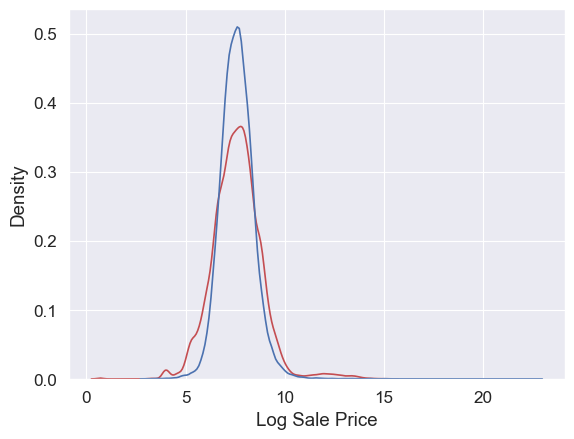

In [53]:
#For Linear Regressor, below is the plot for y_test and y_pred

sns.set_context('paper', font_scale=1.4)

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)

#### Decision Tree Regressor Model

In [54]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
decision_tree_model.fit(X_train_sc, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [55]:
y_pred = decision_tree_model.predict(X_test_sc)

R2_dt_train = decision_tree_model.score(X_train_sc,y_train)
R2_dt_test = decision_tree_model.score(X_test_sc,y_test)

print('Output Metrics for Decision Tree Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_dt_train)
print('Test R-squared           : ', R2_dt_test)

Output Metrics for Decision Tree Regressor Model: 

Mean Absolute Error      :  0.48660942247113836
Mean Squared  Error      :  0.7309897944710966
Root Mean Squared  Error :  0.8549794117235201
Training R-squared       :  0.600545784028149
Test R-squared           :  0.5412603312454349


<AxesSubplot:xlabel='Log Sale Price', ylabel='Density'>

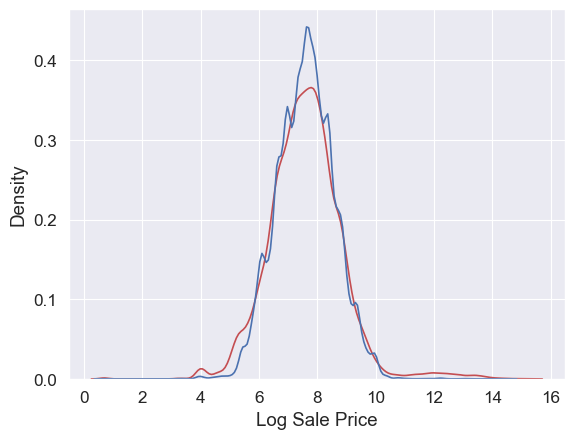

In [56]:
#For DT Regressor, below is the plot for y_test and y_pred

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)

#### Random Forest Regressor Model

Hyperparameter used: max_depth - (as per decision tree model), n_estimators - I tried with values like 50, 75, 100, 120, 150, 170, 200 and observed that 150 would be appropriate as increasing the value above 150 introduced overfitting and decreasing it below 150 reduced the training and the test accuracy(underfitting).

In [57]:
# Random Forest
rf = RandomForestRegressor(n_estimators=150,max_depth=10,random_state=42)
rf.fit(X_train_sc, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [59]:
y_pred = rf.predict(X_test_sc)

R2_rf_train = rf.score(X_train_sc,y_train)
R2_rf_test = rf.score(X_test_sc,y_test)

print('Output Metrics for Random Forest Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_rf_train)
print('Test R-squared           : ', R2_rf_test)

Output Metrics for Random Forest Regressor Model: 

Mean Absolute Error      :  0.46445502756101814
Mean Squared  Error      :  0.6819694200371135
Root Mean Squared  Error :  0.8258143980563147
Training R-squared       :  0.6229334719502226
Test R-squared           :  0.5720235382014786


<AxesSubplot:xlabel='Log Sale Price', ylabel='Density'>

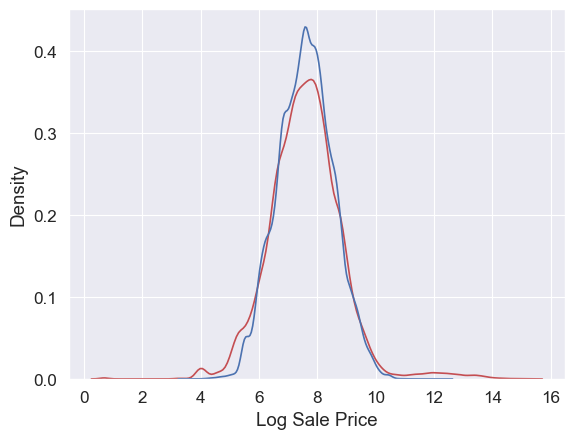

In [60]:
#For RF Regressor, below is the plot for y_test and y_pred

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)

#### XGBoost Regressor Model

In [61]:
# XGBoost Regressor

XGB = XGBRegressor(n_estimators=150, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=42)
XGB.fit(X_train_sc,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
y_pred = XGB.predict(X_test_sc)

R2_XGB_train = XGB.score(X_train_sc,y_train)
R2_XGB_test = XGB.score(X_test_sc,y_test)

print('Output Metrics for XGBoost Regressor Model: \n')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Training R-squared       : ', R2_XGB_train)
print('Test R-squared           : ', R2_XGB_test)

Output Metrics for XGBoost Regressor Model: 

Mean Absolute Error      :  0.4522776333314076
Mean Squared  Error      :  0.6705505225826882
Root Mean Squared  Error :  0.8188714933264487
Training R-squared       :  0.7792020099530337
Test R-squared           :  0.5791895770099622


<AxesSubplot:xlabel='Log Sale Price', ylabel='Density'>

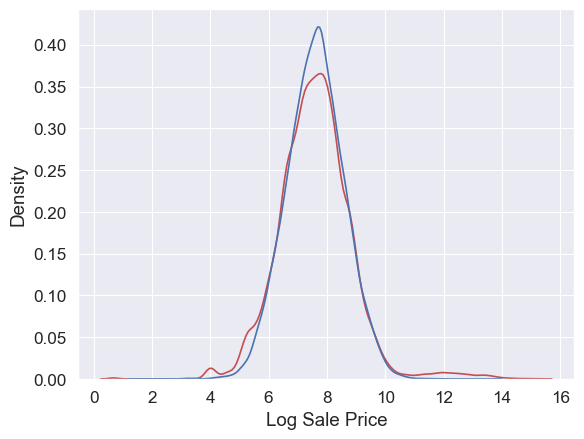

In [63]:
#For XGBoost Regressor, below is the plot for y_test and y_pred

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)

***Note:***

As we have considered 'Log Sale Price' as target variable, while predicting the actual Sale Price it needs to be converted back to its original form i.e. we have to exponentiate to get predictions in the original scale.

We can do it by using below line of code after predicting y_test.

**predicted_sale_price = np.expm1(y_pred)**

where y_pred = model.predict(X_test_sc)

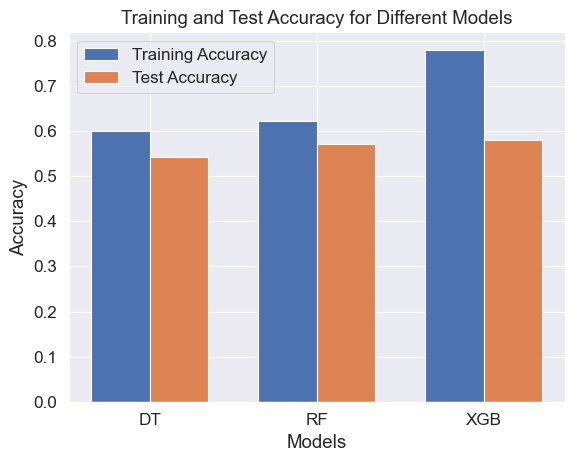

In [64]:
#sns.set_context('paper', font_scale=1.4)

model_names = ['DT', 'RF', 'XGB']
train_scores = [R2_dt_train, R2_rf_train, R2_XGB_train]
test_scores = [R2_dt_test, R2_rf_test, R2_XGB_test ]


bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, train_scores, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_scores, bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy for Different Models')

plt.xticks(index + bar_width / 2, model_names)

plt.legend(loc='best')
plt.show()

Random Forest model is better explaining the data as compared to other two models.
Further, we can implement Hyperparameter Tuning and Cross Validation to improve the performance of the model.